# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | British Airways are not the...
1,✅ Trip Verified | Stupidly tried BA again aft...
2,Not Verified | Seat horribly narrow; 3-4-3 on...
3,✅ Trip Verified | Glasgow to London delayed b...
4,✅ Trip Verified | When I tried to check in on...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
# Removing unnecesarry text with str.lstrip
df["reviews"] = df["reviews"].str.lstrip("✅ Trip Verified |")
df["reviews"] = df["reviews"].str.lstrip("Not Verified |")
df.head()

,reviews
0,British Airways are not the flag carrier they ...
1,Stupidly tried BA again after a five year gap ...
2,Seat horribly narrow; 3-4-3 on a 777. Thankful...
3,Glasgow to London delayed by 1 hour. My wife a...
4,"When I tried to check in online, I was offered..."


In [6]:
# Convert all text to lowercase
df["reviews"] = df["reviews"].str.lower()

In [7]:
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

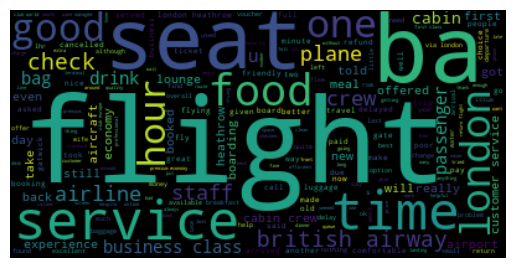

There are 805005 words in the combination of all review.


In [8]:
# Create Series:
text = " ".join(rev for rev in df["reviews"])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
print ("There are {} words in the combination of all review.".format(len(text)))

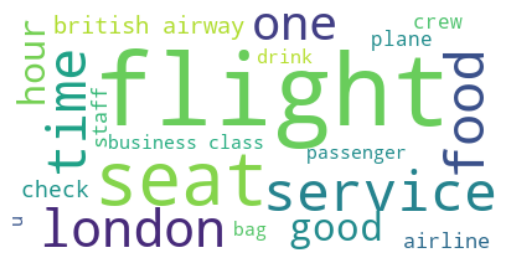

In [9]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["ba", "british airways","british airway"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=20).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<AxesSubplot:>

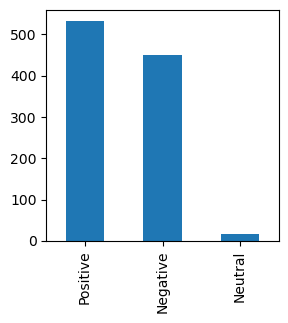

In [16]:
#Sentiment Check
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()
df["polarity"]=[analyzer.polarity_scores(t) for t in df["reviews"]]

def get_sentiment(polarity):
    if polarity["compound"] < -0.05:
        return 'Negative'
    elif polarity["compound"] > 0.05:
        return 'Positive'
    else:
        return 'Neutral'
df["sentiment"]=df["polarity"].apply(get_sentiment)
plt.figure(figsize=(3,3))
df["sentiment"].value_counts().plot.bar()

In [17]:
df["sentiment"].value_counts()

Positive    533
Negative    450
Neutral      17
Name: sentiment, dtype: int64